In [ ]:
#different Random indices to connect matrix

[[ 240.    0. -140.   70.    0. -130. -100.   60.]
 [   0.  435.   60. -400. -130.    0.   70.  -35.]
 [-140.   60.  240. -130. -100.   70.    0.    0.]
 [  70. -400. -130.  435.   60.  -35.    0.    0.]
 [   0. -130. -100.   60.  240.    0. -140.   70.]
 [-130.    0.   70.  -35.    0.  435.   60. -400.]
 [-100.   70.    0.    0. -140.   60.  240. -130.]
 [  60.  -35.    0.    0.   70. -400. -130.  435.]]


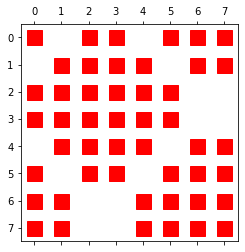

In [8]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4','i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 8
num_element_stiffness_matrices = 2
element_stiffness_matrices = [np.array([[140,0,0,-70,-140,70],[0,400,-60,0,60,-400],[0,-60,100,0,-100,60],[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130],[70,-400,60,-35,-130,435]]),
                             np.array([[100,0,-100,60,0,-60],[0,35,70,-35,-70,0],[-100,70,240,-130,-140,60],[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0],[-60,0,60,-400,0,400]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indicesre.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

# solve the force vector given by 
#the assembly is much simpler than gst assembly 
#just look for the indices like 
#1,3,2
#{1.333,1.333,1.333}
#3,4,2
#{1.333,1.3333,1.333}
#4,5,2
#{1.333,1.333,1.333}
#5,1,2
#{1.333,1.333,1.333}
#you know why 2,4,5 adds up because it exist in three columns so it adds up
#[ 2.666,5.333,2.666,2.666,2.666]
#there are some coeeficients to solve it

In [ ]:
#same indices repeated indices to connect matrix 

[[ 835.  -70.    0. -340.   70.  -35. -460.    0.]
 [ -70.  480.    0. -230.  -70.   70.  -40. -140.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [-340. -230.    0.  535.  -35.    0.    0.   70.]
 [  70.  -70.    0.  -35.  175.  -70.    0.  -70.]
 [ -35.   70.    0.    0.  -70.   35.    0.    0.]
 [-460.  -40.    0.    0.    0.    0.  500.    0.]
 [   0. -140.    0.   70.  -70.    0.    0.  140.]]


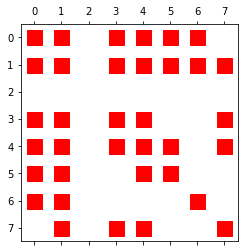

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.choice(np.arange(1, n+1), 6, replace=False)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4','i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 8
num_element_stiffness_matrices = 2
element_stiffness_matrices = [np.array([[140,0,0,-70,-140,70],[0,400,-60,0,60,-400],[0,-60,100,0,-100,60],[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130],[70,-400,60,-35,-130,435]]),
                             np.array([[100,0,-100,60,0,-60],[0,35,70,-35,-70,0],[-100,70,240,-130,-140,60],[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0],[-60,0,60,-400,0,400]])]
filename = '/content/indicesre.csv'
generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv(filename)
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')


In [ ]:
#convert the repeated indices to it gives this result "[1, 1, 3, 3, 2, 2]
 #i asked for [1,2,5,6,3,4] this

In [ ]:
#[1,1,4,4,3,3] to [1	,2	,7,	8	,5	,6]

In [ ]:
	i2	i3	i4	i5	i6
1	2	5	6	3	4
1	2	7	8	5	6

In [9]:
original_list_1 = [1, 1, 3, 3, 2, 2]
original_list_2 = [1, 1, 2, 2, 3, 3]
new_list = []

for num in original_list_1:
    index = original_list_2.index(num)
    new_num = original_list_2[index+1]
    new_list.append(new_num)

print(new_list)


[1, 1, 3, 3, 2, 2]


In [10]:
original_list_1 = [1, 1, 3, 3, 2, 2]
original_list_2 = [1, 1, 2, 2, 3, 3]
new_list = []

for num in original_list_1:
    index = original_list_2.index(num)
    new_num = original_list_2[index+1]
    if new_num not in new_list:
        new_list.append(new_num)
    else:
        next_num = original_list_2[index+2]
        new_list.append(next_num)

print(new_list)


IndexError: ignored

In [11]:
original_list_1 = [1, 1, 3, 3, 2, 2]
original_list_2 = [1, 1, 2, 2, 3, 3]
new_list = []

for i, num in enumerate(original_list_1):
    index = original_list_2.index(num)
    if index == len(original_list_2) - 1:
        new_num = original_list_2[index-1]
    elif original_list_2[index+1] in new_list:
        new_num = original_list_2[index+2]
    else:
        new_num = original_list_2[index+1]
    new_list.append(new_num)

print(new_list)


IndexError: ignored